# chapter2 feature engineering code

## install dependencies

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

## page rank

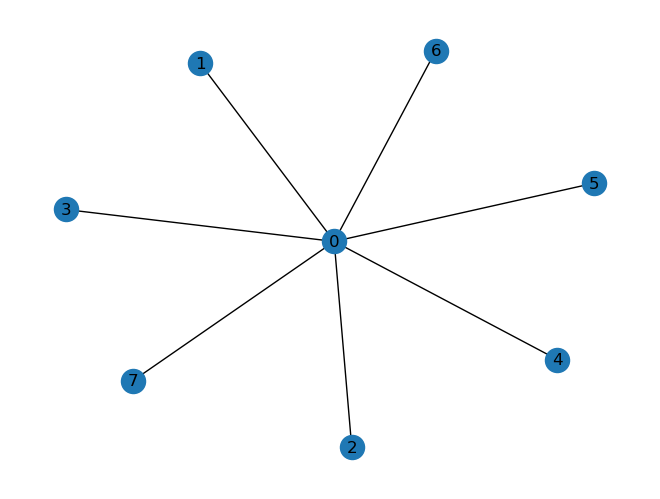

In [5]:
G = nx.star_graph(7)
nx.draw(G, with_labels=True)

In [6]:
pagerank = nx.pagerank(G, alpha=0.8)
pagerank

{0: 0.4583348922684132,
 1: 0.07738072967594098,
 2: 0.07738072967594098,
 3: 0.07738072967594098,
 4: 0.07738072967594098,
 5: 0.07738072967594098,
 6: 0.07738072967594098,
 7: 0.07738072967594098}

## degree

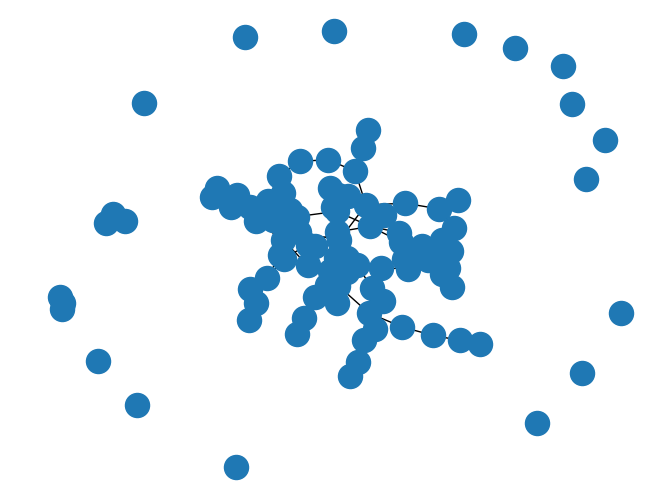

In [9]:
G = nx.gnp_random_graph(100, 0.02, seed=10374196)
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos)